# Primera Practica

In [2]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

In [1]:
ruta1 = 'Imagenes_para_contraste/asteroid.jpg'
ruta2 = 'Imagenes_para_contraste/niebla0.png'

### Ej1:
Dada una imagen y un valor entero: 2, 3 o 4 muestre la imagen obtenida de multiplicarla por alguno de esos valores.

In [3]:
def f1(ruta:str, factor:int): 
    img = cv2.imread(ruta,cv2.IMREAD_GRAYSCALE)
    if img is None: 
        print("Error ruta no valida")
        exit()
    img_res = img * factor
    cv2.imshow('Original',img)
    cv2.imshow(f'Multiplicada por {factor}',img_res)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [58]:
f1(ruta1,6)

### Ej2 
Implementar una función que dada una imagen devuelva su negativo.

In [4]:
def f2(ruta:str): 
    img = cv2.imread(ruta,cv2.IMREAD_GRAYSCALE)
    if img is None: 
        print("Error ruta no valida")
        exit()
    negativo = np.iinfo(img.dtype).max - img
    cv2.imshow("Negativo",negativo)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [38]:
f2(ruta1)

# Ej3 
Implementar una función que dada una imagen devuelva el histograma de niveles de gris.

In [5]:
def f3(ruta:str, mostrar:bool=False):
    img = cv2.imread(ruta,cv2.IMREAD_GRAYSCALE)
    if img is None: 
        print("Error ruta no valida")
        exit()
    bins = np.iinfo(img.dtype).max+1 
    X,Y = img.shape
    histogram = np.zeros(bins)
    for i in range(X):
        for j in range(Y): 
            gris = img[i,j]
            histogram[gris] += 1
    if mostrar :
        plt.plot(histogram, color='red')
        plt.title('Histograma de Niveles de Gris')
        plt.xlabel('Nivel de Gris')
        plt.ylabel('Cantidad de Píxeles')
        plt.xlim([0,bins-1])
        plt.show()
    return histogram

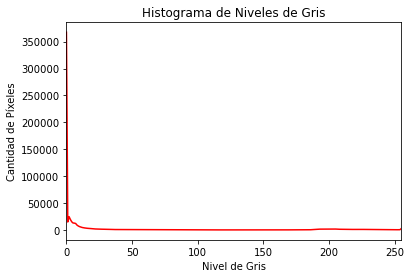

array([3.6746e+05, 1.4849e+04, 2.4799e+04, 1.9518e+04, 1.5320e+04,
       1.3035e+04, 1.2791e+04, 1.2103e+04, 9.1950e+03, 7.4530e+03,
       6.2600e+03, 5.4400e+03, 4.6620e+03, 4.1760e+03, 3.7630e+03,
       3.4170e+03, 3.1400e+03, 2.9820e+03, 2.6350e+03, 2.5590e+03,
       2.2740e+03, 2.0250e+03, 1.8950e+03, 1.8760e+03, 1.7180e+03,
       1.5810e+03, 1.5050e+03, 1.4780e+03, 1.3990e+03, 1.3670e+03,
       1.2880e+03, 1.2330e+03, 1.1580e+03, 1.1110e+03, 1.0610e+03,
       1.0110e+03, 1.0330e+03, 8.6900e+02, 8.0000e+02, 8.2900e+02,
       8.3400e+02, 8.2300e+02, 8.0200e+02, 7.8100e+02, 7.7500e+02,
       7.9500e+02, 7.2100e+02, 7.4200e+02, 7.3900e+02, 7.1200e+02,
       7.2200e+02, 7.0300e+02, 6.6100e+02, 6.3300e+02, 6.4900e+02,
       6.3700e+02, 6.0400e+02, 5.9700e+02, 5.5900e+02, 5.7700e+02,
       5.9900e+02, 4.8400e+02, 4.6700e+02, 4.6400e+02, 5.1900e+02,
       4.5000e+02, 4.5500e+02, 4.5200e+02, 4.1100e+02, 3.9100e+02,
       4.4200e+02, 4.0100e+02, 4.0300e+02, 3.7100e+02, 3.3100e

In [40]:
f3(ruta1,mostrar = True)

### Ej4
Examinando el histograma, implementar una función que devuelva una imagen que tenga aumento del contraste.

Defino 2 funciones `equalization`
$$equalization(r,s) = f:r \rightarrow s $$ 

Toma como argumentos la funcion de distribucion acumulada de X e Y, y devuelve una funcion f que toma valores de X y manda a Y, siguiendo la formula $[1]$ $n^{\sim}=min_n \{ n:w^{\sim}_n\leq w \}$.

$$equalization2(r) = f:r \rightarrow s $$
Solo toma como argumento la cdf de X, y hace el calculo para obtener en "teoria" lo mismo que `equalization`, siempre y cuando $Y$ ~ $Uniform$

obs: `equalization` es una generalizacion de `equalization2`. 

In [7]:
U = np.array([(i+1)/256 for i in range(256)]) # cdf de una uniforme. 
def equalization2(distri_x,distri_y): 
    n = len(distri_x)
    #print("len X",n)
    #print("len Y",len(distri_y))
    res = np.zeros(n)
    for i in range(n): 
        #print(distri_y - distri_x[i])
        res[i] = np.argmax(distri_y - distri_x[i] >= 0)
        #print(res[i])
    return res.astype(int)
def equalization(cdf,l): # l = L - 1
    smin = cdf[0]
    equa = np.floor((cdf-smin)/(1-smin) * l + 0.5).astype(int)
    return equa

### Hacemos la comparacion de ambos: 

In [8]:
def comparacionEqua(ruta:str):
    img = cv2.imread(ruta,cv2.IMREAD_GRAYSCALE)
    if img is None: 
        print("Error ruta no valida")
        exit()
    hist_original = f3(ruta)
    bins = np.iinfo(img.dtype).max + 1
    cdf = hist_original.cumsum() / img.size
    equa1 = equalization(cdf,bins-1)
    res_img = img.copy()
    equa2 = equalization2(cdf,U)
    X,Y = img.shape
    hist_equ1 = np.zeros(bins)
    hist_equ2 = np.zeros(bins)
    for i in range(X):
        for j in range(Y): 
            gris1 = equa1[img[i,j]]
            gris2 = equa2[img[i,j]]
            hist_equ1[gris1] += 1
            hist_equ2[gris2] += 1
    plt.figure(figsize=(8, 6))
    plt.plot(hist_equ1, color='red',label='Histograma Ecualizado 1')
    plt.plot(hist_equ2, color='blue',label='Histograma Ecualizado 2')
    plt.legend()
    plt.title('Comparacion de Histogramas ecualizados')
    plt.xlabel('Nivel de Gris')
    plt.ylabel('Cantidad de Píxeles')
    plt.xlim([0,bins-1])
    plt.show()

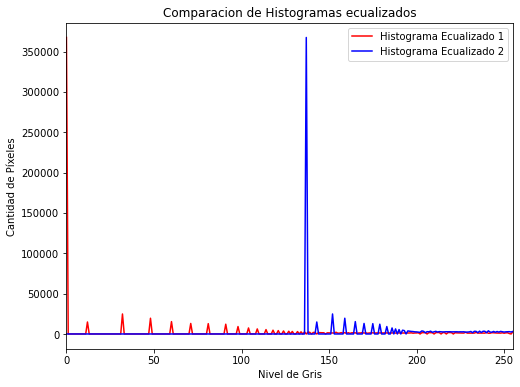

In [43]:
comparacionEqua(ruta1)

No me termina de cerrar porque son distintos, pero creo que esta bien el calculo de ambas funciones, ya que para `equalization2` y esta imagen en particular que toma muchos valores cercanos a 0, hace que cuando se calcula $[1]$ le cuesta "mas" encontrar el min n que haga que valga la desigualdad, y como consecuencia hace que todos esos valores cercanos a cero se vayan "corriendo" al "medio".

In [9]:
def f4(ruta:str):
    img = cv2.imread(ruta,cv2.IMREAD_GRAYSCALE)
    if img is None: 
        print("Error ruta no valida")
        exit()
    hist_original = f3(ruta)
    bins = np.iinfo(img.dtype).max + 1
    cdf = hist_original.cumsum() / img.size
    equa = equalization(cdf,bins-1)
    res_img = img.copy()
    #equa2 = equalization2(cdf,U)
    #print("equalization2",equa2.astype(int))
    #print("equalization",equa)
    X,Y = img.shape
    hist_equ = np.zeros(bins)
    for i in range(X):
        for j in range(Y): 
            res_img[i,j] = equa[img[i,j]]
    cv2.imshow('Original',img)
    cv2.imshow("Ecualizada",res_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    #return res_img 

In [ ]:
f4(ruta1)

### Ej5
Implementar una función que dada una imagen y un valor de umbral devuelva una imagen binarizada.

In [6]:
def f5(ruta:str, umbral:int,mostrar:bool=False):
    """
    Suponemos que umbral esta en rango correspondiente.
    """
    img = cv2.imread(ruta,cv2.IMREAD_GRAYSCALE)
    if img is None: 
        print("Error ruta no valida")
        exit()
    bin_img = (img >= umbral) * (np.iinfo(img.dtype).max)
    bin_img = bin_img.astype(np.uint8)
    if mostrar:
        cv2.imshow('Binarizada',bin_img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    return bin_img

In [9]:
f5(ruta2,157,mostrar=True)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

### Ej6 
Implementar una función que dada una imagen muestre el histograma original y el histograma
equalizado.

In [28]:
def f6(ruta:str):
    hist_original = f3(ruta)
    img = cv2.imread(ruta,cv2.IMREAD_GRAYSCALE)
    if img is None: 
        print("Error ruta no valida")
        exit()
    bins = np.iinfo(img.dtype).max + 1
    cdf = hist_original.cumsum() / img.size
    equa = equalization(cdf,bins-1)
    X,Y = img.shape
    hist_equ = np.zeros(bins)
    for i in range(X):
        for j in range(Y): 
            gris = equa[img[i,j]]
            hist_equ[gris] += 1
    plt.figure(figsize=(10, 8))

    plt.subplot(2, 1, 1)  # (filas, columnas, índice)
    plt.plot(hist_original, color='blue')
    plt.title('Histograma original')
    plt.xlabel('Intensidad')
    plt.ylabel('Frecuencia')

    plt.subplot(2, 1, 2)  # (filas, columnas, índice)
    plt.plot(hist_equ, color='red')
    plt.title('Histograma ecualizado')
    plt.xlabel('Intensidad')
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

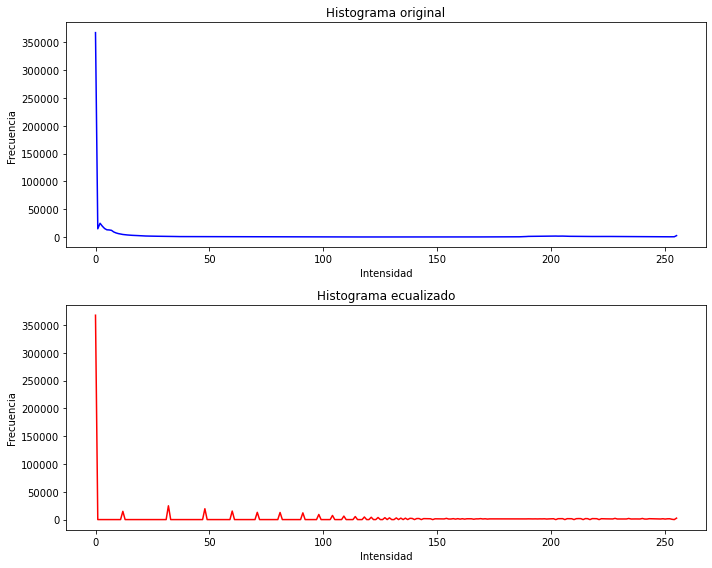

In [30]:
f6(ruta1)

### Ej7 
Dada una imagen a la cual se le ecualizo su histograma, aplicar la ecualizacion del histograma por segunda vez a la misma imagen. Observar el resultado y dar una explicacion de lo sucedido.

In [31]:
def f7(ruta:str): 
    img = cv2.imread(ruta,cv2.IMREAD_GRAYSCALE)
    if img is None: 
        print("Error ruta no valida")
        exit()
    histogram = f3(ruta)
    bins = np.iinfo(img.dtype).max + 1
    cdf = histogram.cumsum() / img.size
    # primera equalizacion 
    equa1 = equalization(cdf,bins-1)
    X,Y = img.shape
    hist_equa = np.zeros(bins)
    for i in range(X):
        for j in range(Y): 
            gris = equa1[img[i,j]]
            hist_equa[gris] += 1
    cdf2 = hist_equa.cumsum() / img.size
    # segunda equalization
    equa2 = equalization(cdf2,bins-1)
    hist_equa2 = np.zeros(bins)
    for i in range(X):
        for j in range(Y): 
            gris = equa2[img[i,j]]
            hist_equa2[gris] += 1
    plt.plot(hist_equa2, color='red')
    plt.title('Histograma de Niveles de Gris')
    plt.xlabel('Nivel de Gris')
    plt.ylabel('Cantidad de Píxeles')
    plt.xlim([0,bins])
    plt.show()

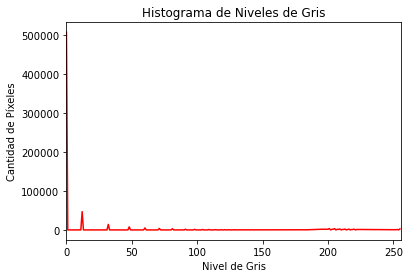

In [33]:
f7(ruta1)

Vemos que para esta imagen, obtenemos el mismo histograma ecualizado 1, creo que esto sucede porque el proceso de ecualización de la img convierte la distribución original empirica de los valores de intensidad en una distribución lo más uniforme posible, una vez aplicada la ecualización y el histograma ha sido "uniformizado", cualquier intento de ecualizar la imagen ya no cambiara significativamente el histograma.

### Ej8 

In [34]:
# No llegue :( 